In [1]:
import matplotlib as plt 
import seaborn as sns  
import numpy as np 
import pandas as pd 
import scipy as sp

In [3]:
from sklearn.datasets import fetch_openml 
survey = fetch_openml(data_id=534, as_frame=True, parser="pandas")

In [14]:
X = survey.data 
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [17]:
X.dtypes

EDUCATION        int64
SOUTH         category
SEX           category
EXPERIENCE       int64
UNION         category
AGE              int64
RACE          category
OCCUPATION    category
SECTOR        category
MARR          category
dtype: object

In [21]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

c:\Users\tomsm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


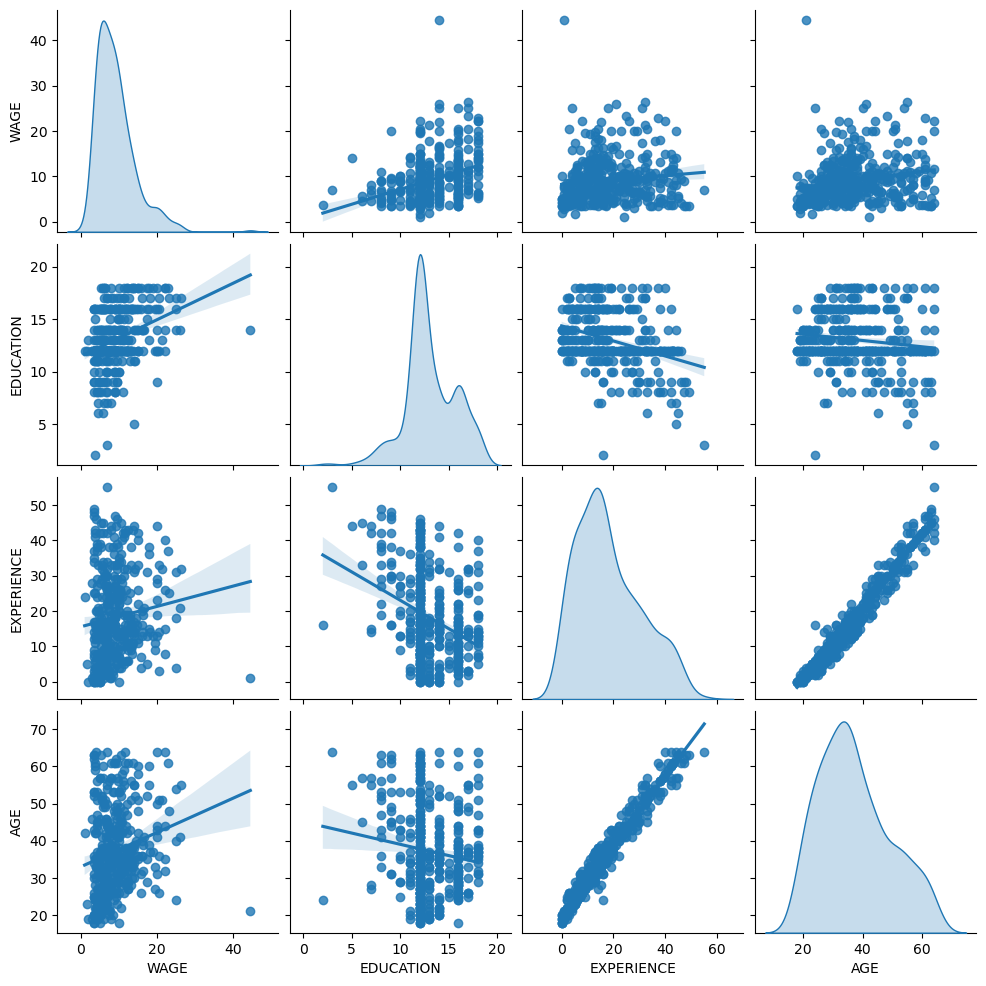

In [25]:
train_dataset = X_train.copy()
train_dataset.insert(0, 'WAGE', y_train)
sns.pairplot(train_dataset, kind="reg", diag_kind="kde");

In [27]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.3 KB


Now do a one hot encoding for the categorical features

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [36]:
[idx for idx, val in X.dtypes.items() if isinstance(val, pd.core.dtypes.dtypes.CategoricalDtype)]

['SOUTH', 'SEX', 'UNION', 'RACE', 'OCCUPATION', 'SECTOR', 'MARR']

In [33]:
type(X.dtypes['RACE'])

pandas.core.dtypes.dtypes.CategoricalDtype